<a href="https://colab.research.google.com/github/krushaalkalkani/u-machine-learning/blob/main/insurance_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the Dataset

In [2]:
dataset = pd.read_csv('insurance.csv')
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1:]

In [5]:
print(dataset.isnull().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [3]:
print(x)

[[19 'female' 27.9 0 'yes' 'southwest']
 [18 'male' 33.77 1 'no' 'southeast']
 [28 'male' 33.0 3 'no' 'southeast']
 ...
 [18 'female' 36.85 0 'no' 'southeast']
 [21 'female' 25.8 0 'no' 'southwest']
 [61 'female' 29.07 0 'yes' 'northwest']]


In [4]:
print(y)

          charges
0     16884.92400
1      1725.55230
2      4449.46200
3     21984.47061
4      3866.85520
...           ...
1333  10600.54830
1334   2205.98080
1335   1629.83350
1336   2007.94500
1337  29141.36030

[1338 rows x 1 columns]


## Encoding categorical data


### Encoding the Independent Variable

In [10]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1, 4, 5])], remainder='passthrough')
x = np.array(ct.fit_transform(x))




## Splitting the dataset into the Training set and Test set

In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

In [13]:
print(x_train)

[[1.0 0.0 1.0 ... 53 26.6 0]
 [0.0 1.0 1.0 ... 53 21.4 1]
 [0.0 1.0 1.0 ... 18 37.29 0]
 ...
 [1.0 0.0 0.0 ... 51 34.96 2]
 [1.0 0.0 0.0 ... 40 22.22 2]
 [0.0 1.0 1.0 ... 57 27.94 1]]


In [14]:
print(x_test)

[[0.0 1.0 1.0 ... 19 35.53 0]
 [0.0 1.0 1.0 ... 57 31.54 0]
 [0.0 1.0 1.0 ... 51 37.0 0]
 ...
 [0.0 1.0 0.0 ... 47 38.94 2]
 [1.0 0.0 1.0 ... 19 36.575 0]
 [1.0 0.0 1.0 ... 35 26.125 0]]


In [15]:
print(y_train)

          charges
216   10355.64100
731   10065.41300
866    1141.44510
202   13012.20865
820    7445.91800
...           ...
715   12146.97100
905    4564.19145
1096  44641.19740
235   19444.26580
1061  11554.22360

[1070 rows x 1 columns]


In [16]:
print(y_test)

          charges
559    1646.42970
1087  11353.22760
1020   8798.59300
460   10381.47870
802    2103.08000
...           ...
682   40103.89000
629   42983.45850
893   44202.65360
807    2136.88225
1165   5227.98875

[268 rows x 1 columns]


## Training the Multiple Linear Regression model on the Training set

In [17]:
from sklearn.linear_model import LinearRegression
linear_regressor = LinearRegression()
linear_regressor.fit(x_train, y_train)

LinearRegression()

## Predicting the Test set results

In [18]:
y_predict = linear_regressor.predict(x_test)


In [19]:
print(y_predict)

[[ 4383.68089988]
 [12885.03892192]
 [12589.21653212]
 [13286.22919217]
 [  544.72832757]
 [32117.58400779]
 [12919.04237221]
 [12318.62183013]
 [ 3784.29145555]
 [29468.45725408]
 [11002.8139431 ]
 [17539.69473777]
 [ 8681.35471964]
 [ 8349.04325528]
 [ 3130.12725504]
 [10445.83896118]
 [ 3863.74357865]
 [ 6944.62510786]
 [15009.63121084]
 [14441.59911875]
 [12543.65768867]
 [32958.72553095]
 [ 9072.63608136]
 [ 8986.85860053]
 [ 3022.85773293]
 [ 8164.97136102]
 [ 9556.07558002]
 [10743.20363927]
 [ 7694.01743692]
 [ 4373.43771674]
 [14140.93557984]
 [ 5811.78545062]
 [34631.91316718]
 [27009.11191231]
 [33348.14098668]
 [ 9532.96786929]
 [30421.65017927]
 [26648.91186842]
 [15157.78333287]
 [33895.76121465]
 [ 6303.38552088]
 [14059.15156303]
 [10713.4467824 ]
 [15089.36171493]
 [ 4187.95334069]
 [13106.4297513 ]
 [ 4336.19603407]
 [28607.05556216]
 [ 7243.57117377]
 [14269.4643165 ]
 [13282.36924936]
 [12329.61280721]
 [ 1851.87215658]
 [ 8876.2837892 ]
 [26089.18341811]
 [10125.82

In [20]:
from sklearn.metrics import r2_score

r_squared = r2_score(y_test, y_predict)
print(f"R-squared Score: {r_squared}")

R-squared Score: 0.7623311844057113


## Training the Polynomial Regression model on the whole dataset

In [33]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=4)
x_poly = poly_reg.fit_transform(x_train)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(x_poly, y_train)


LinearRegression()

In [35]:
x_test_poly = poly_reg.transform(x_test)
y_predict_poly = lin_reg_2.predict(x_test_poly)

In [37]:
r_squared = r2_score(y_test, y_predict_poly)
print(f"R-squared Score: {r_squared}")

R-squared Score: 0.7797004626614811


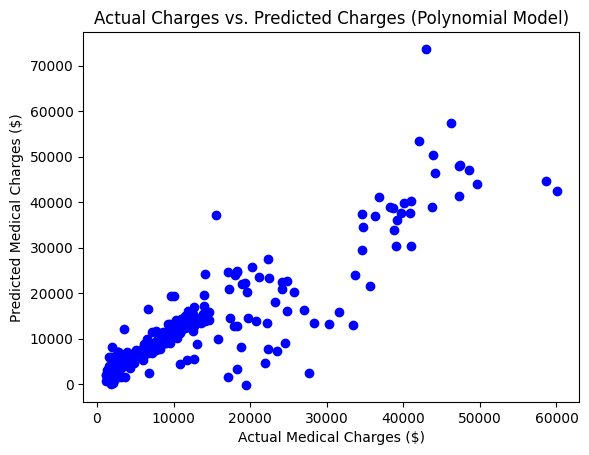

In [38]:
# We plot the actual test answers on the X-axis and our predictions on the Y-axis
plt.scatter(y_test, y_predict_poly, color='blue')

# Updating the labels to match our current project
plt.title('Actual Charges vs. Predicted Charges (Polynomial Model)')
plt.xlabel('Actual Medical Charges ($)')
plt.ylabel('Predicted Medical Charges ($)')

plt.show()